In [42]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns

In [21]:
df = pd.read_csv("diamonds-datamad0820/sample_submission.csv")
df

,id,price
0,0,2452
1,1,13670
2,2,4875
3,3,12188
4,4,9229
...,...,...
13480,13480,7299
13481,13481,2968
13482,13482,14628
13483,13483,1260


In [22]:
df2 = pd.read_csv("diamonds-datamad0820/train.csv", index_col = 0)
df2

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447
...,...,...,...,...,...,...,...,...,...,...
40450,0.90,Good,D,SI1,63.8,58.0,6.13,6.09,3.90,4120
40451,0.35,Ideal,D,VVS1,62.0,54.0,4.56,4.57,2.83,1266
40452,0.90,Good,G,SI2,58.4,55.0,6.34,6.39,3.72,3269


In [23]:
df2.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [24]:
df2.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [25]:
df2["cut"].value_counts()

Ideal        16250
Premium      10342
Very Good     9026
Good          3639
Fair          1198
Name: cut, dtype: int64

In [26]:
df2["color"].value_counts()

G    8565
E    7344
F    7162
H    6147
D    5063
I    4052
J    2122
Name: color, dtype: int64

In [27]:
df2["clarity"].value_counts()

SI1     9806
VS2     9204
SI2     6865
VS1     6099
VVS2    3778
VVS1    2776
IF      1365
I1       562
Name: clarity, dtype: int64

In [28]:
le = preprocessing.LabelEncoder()

df2["cut"] = le.fit_transform(df2["cut"])
df2["color"] = le.fit_transform(df2["color"])
df2["clarity"] = le.fit_transform(df2["clarity"])

In [15]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.12,3,4,2,61.6,59.0,6.67,6.63,4.10,5363
1,1.14,4,1,3,60.0,54.0,6.74,6.97,4.11,5593
2,0.90,4,0,3,60.3,63.0,6.12,6.22,3.72,3534
3,0.71,2,1,4,61.9,54.0,5.74,5.76,3.56,3212
4,0.34,4,2,3,60.0,62.0,4.51,4.55,2.72,447


In [29]:
df2.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798121,2.552688,2.594067,3.833642,61.745132,57.451892,5.731217,5.735248,3.538685,3938.101125
std,0.474880,1.025211,1.699853,1.726293,1.434259,2.225893,1.123364,1.152859,0.710579,3992.645108
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.700000,5.710000,3.520000,2401.000000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5333.000000
max,5.010000,4.000000,6.000000,7.000000,79.000000,79.000000,10.740000,58.900000,31.800000,18818.000000


<AxesSubplot:>

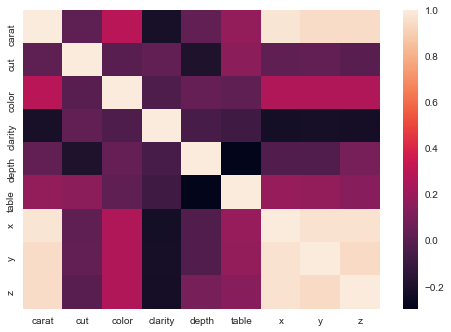

In [45]:
columnas = [i for i in df2.columns if i not in ["price"]]
X = df2[columnas]
sns.heatmap(X.corr())

In [28]:
df2.to_csv("csv preparado/train_ready.csv")

## Predict csv

In [31]:
df3 = pd.read_csv("diamonds-datamad0820/predict.csv", index_col = 0)
df3

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.33,Very Good,I,IF,62.0,58.0,4.44,4.46,2.76
1,1.21,Very Good,D,SI2,62.4,58.0,6.77,6.83,4.24
2,1.06,Very Good,D,SI1,59.3,60.0,6.64,6.71,3.96
3,0.36,Ideal,E,VVS1,61.4,57.0,4.64,4.61,2.54
4,0.70,Ideal,E,VS1,62.3,54.0,5.67,5.72,3.55
...,...,...,...,...,...,...,...,...,...
13480,2.04,Good,D,SI1,61.9,60.0,8.15,8.11,5.03
13481,0.31,Ideal,G,IF,61.7,55.0,4.37,4.39,2.70
13482,0.52,Ideal,D,VVS2,62.0,56.0,5.14,5.18,3.20


In [32]:
df3.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [33]:
df2.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [34]:
le3 = preprocessing.LabelEncoder()

df3["cut"] = le3.fit_transform(df3["cut"])
df3["color"] = le3.fit_transform(df3["color"])
df3["clarity"] = le3.fit_transform(df3["clarity"])

In [35]:
df3.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.33,4,5,1,62.0,58.0,4.44,4.46,2.76
1,1.21,4,0,3,62.4,58.0,6.77,6.83,4.24
2,1.06,4,0,2,59.3,60.0,6.64,6.71,3.96
3,0.36,2,1,6,61.4,57.0,4.64,4.61,2.54
4,0.70,2,1,4,62.3,54.0,5.67,5.72,3.55


In [36]:
df3.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.00000,13485.000000
mean,0.797397,2.553949,2.594587,3.839674,61.762225,57.473059,5.730977,5.73236,3.538879
std,0.471413,1.035201,1.704919,1.719532,1.427672,2.260095,1.116980,1.10938,0.690877
min,0.200000,0.000000,0.000000,0.000000,51.000000,44.000000,0.000000,0.00000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.100000,56.000000,4.720000,4.72000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.900000,57.000000,5.690000,5.70000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.530000,6.53000,4.030000
max,4.010000,4.000000,6.000000,7.000000,73.600000,95.000000,10.140000,10.10000,6.170000


<AxesSubplot:>

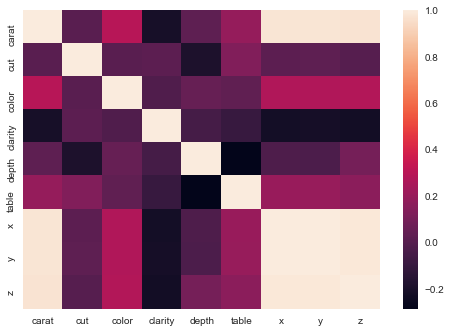

In [46]:
columns = [i for i in df3.columns if i not in ["price"]]
X = df3[columns]
sns.heatmap(X.corr())

In [35]:
df3.to_csv("csv preparado/predict_ready.csv")